* Assuming only linear additive models
* atleast 10 buckets
* source profile should be a distribution
* Assuming gaussian source profile





# save images and data

In [202]:
import matplotlib.pyplot as plt
import numpy as np

## these are the hyper parameters, change as reqd.

n=1000 
start=-15
end=10
NOISE = 1 # noise coeff

# distributions (gaussian)

info1={"coeff":0.3,"mean":-10,"variance":1}
info2={"coeff":0.02,"mean":-5,"variance":2}
info3={"coeff":0.4,"mean":-5,"variance":0.5}
info4={"coeff":0.28,"mean":-2,"variance":8}

graphs={"1":info1,"2":info2,"3":info3,"4":info4}


In [203]:
def gaussian(info=None,x=None,train=False):
    if info==None:
        coeff=1
        mean=0
        variance=1
    else:
        coeff=info["coeff"]
        mean=info["mean"]
        variance=info["variance"]
#         print(coeff)
    if train==True:
        coeff=1
    if x==None:
        x=np.random.rand()
    y=coeff*np.exp(-(x-mean)**2/(2*variance))
    return y


def plotter(graphs,x,estm=None):
    y=[]
    for i in x:
        sum=0
        for num,key in enumerate(graphs.keys()):
            if estm!=None:
                graphs[key]["coeff"]=estm[num]
            sum+=gaussian(graphs[key],i)
        y.append(sum)
    return y


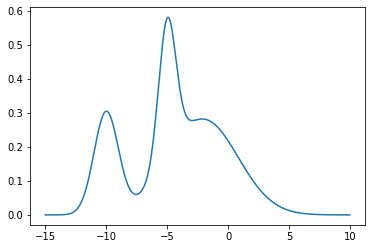

In [204]:

x=[]
y=[]

for i in range(n):
    x.append(i*(end-start)/n+start)

y=plotter(graphs,x)
plt.plot(x,y)

In [214]:
train_x=[]
train_y=[]
for i in range(10):
    index=np.random.randint(0,len(x)-1)
    train_x.append(x[index])
    train_y.append(y[index])
train_data_x=[]
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
train_data_y=[]
for t_y in train_y:
    train_data_y.append(t_y+np.random.randn()*0.05*NOISE)
# plt.scatter(train_x,train_y)

In [215]:
from sklearn import linear_model 
train_data_x=np.array(train_data_x)
train_data_y=np.array(train_data_y)
# # reg = linear_model.LinearRegression()
# reg = linear_model.Lasso(alpha=0.001)
# # reg = linear_model.Ridge(alpha=0.01)
# reg.fit(train_data_x, train_data_y)
# # reg.score(X, y)
# print(reg.coef_)



[0.32839184 0.00547028 0.35582353 0.40360874]


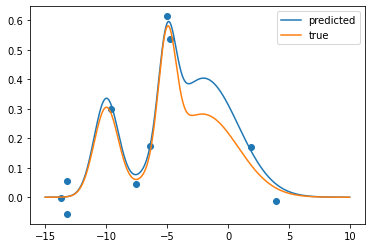

[0.30787215 0.01267536 0.36371579 0.35497947]


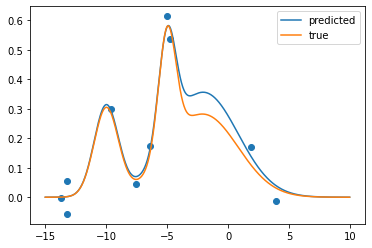

[0.32215041 0.026144   0.34584343 0.37717094]


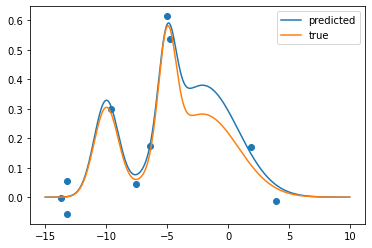

In [216]:
reg = linear_model.LinearRegression()
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

##
reg = linear_model.Lasso(alpha=0.001)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend()
plt.show()

##
reg = linear_model.Ridge(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend()
plt.show()

In [217]:
reg.intercept_

-0.010443042082722814

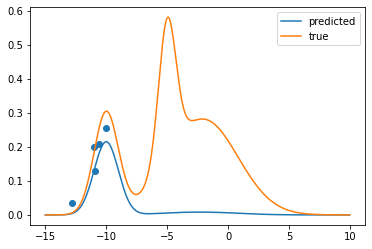

In [88]:
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 

[0.3  0.02 0.4  0.28]


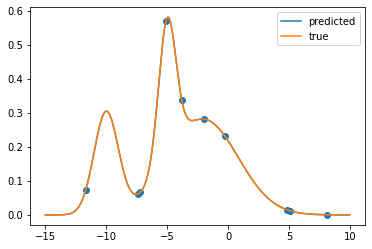

[0.06130039 0.01488079 0.39047113 0.25953978]


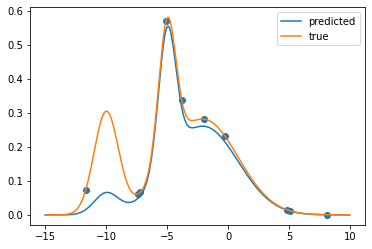

[0.2435829  0.03458334 0.38132971 0.27300359]


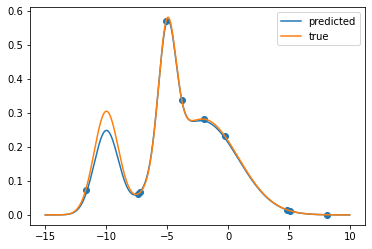

In [195]:
reg = linear_model.LinearRegression()
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

##
reg = linear_model.Lasso(alpha=0.001)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

##
reg = linear_model.Ridge(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

In [218]:
train_x

[1.8500000000000014,
 -6.4,
 -4.75,
 -13.225,
 -5.025,
 -7.525,
 -9.575,
 -13.25,
 3.9250000000000007,
 -13.725]

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(np.array(train_x), train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()